<a href="https://colab.research.google.com/github/karrapreetham/Exploratory-Data-Analysis-using-Python/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

 import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "online_retail_II.csv"

df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"mashlyn/online-retail-ii-uci",file_path)

/tmp/ipython-input-3214498228.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"mashlyn/online-retail-ii-uci",file_path)


Using Colab cache for faster access to the 'online-retail-ii-uci' dataset.


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
def clean_retail_data(dataframe):
    df = dataframe.copy()


    df.columns = [col.strip().replace(" ", "_") for col in df.columns]


    df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


    df = df.dropna(subset=["Customer_ID"])


    df = df[~df["Invoice"].astype(str).str.startswith("C")]


    df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]


    df["Sales"] = df["Quantity"] * df["Price"]

    return df

df_clean = clean_retail_data(df)
print("Cleaned shape:", df_clean.shape)


Cleaned shape: (805549, 9)


In [ ]:
country_revenue = df_clean.groupby("Country")["Sales"].sum().sort_values(ascending=False)

print(country_revenue.head(10))

country_revenue_df = country_revenue.reset_index()
country_revenue_df.columns = ["Country", "Total_Sales"]
country_revenue_df.head()


Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: Sales, dtype: float64


,Country,Total_Sales
0,United Kingdom,1.472315e+07
1,EIRE,6.216311e+05
2,Netherlands,5.542323e+05
3,Germany,4.312625e+05
4,France,3.552575e+05


In [ ]:
country_sales_dict = {}

for _, row in df_clean.iterrows():
    country = row["Country"]
    sale = row["Sales"]
    country_sales_dict[country] = country_sales_dict.get(country, 0) + sale

country_sales_list = list(country_sales_dict.items())
country_sales_list.sort(key=lambda x: x[1], reverse=True)

print("Top 5 countries (using pure Python dict/list):")
for country, sales in country_sales_list[:5]:
    print(country, "->", round(sales, 2))


Top 5 countries (using pure Python dict/list):
United Kingdom -> 14723147.52
EIRE -> 621631.11
Netherlands -> 554232.34
Germany -> 431262.46
France -> 355257.47


In [ ]:
countries_set = set(df_clean["Country"])
print("Number of unique countries:", len(countries_set))

domestic_set = {"United Kingdom"}
international_set = countries_set - domestic_set
print("Domestic countries:", domestic_set)
print("Few international countries:", list(international_set)[:10])


Number of unique countries: 41
Domestic countries: {'United Kingdom'}
Few international countries: ['Singapore', 'Cyprus', 'Iceland', 'Greece', 'Belgium', 'Channel Islands', 'Netherlands', 'Malta', 'West Indies', 'Austria']


In [ ]:
def label_market(country):
    if country == "United Kingdom":
        return "Domestic"
    else:
        return "International"

df_clean["Market_Type"] = df_clean["Country"].apply(label_market)

market_revenue = df_clean.groupby("Market_Type")["Sales"].sum()
print(market_revenue)


Market_Type
Domestic         1.472315e+07
International    3.020282e+06
Name: Sales, dtype: float64


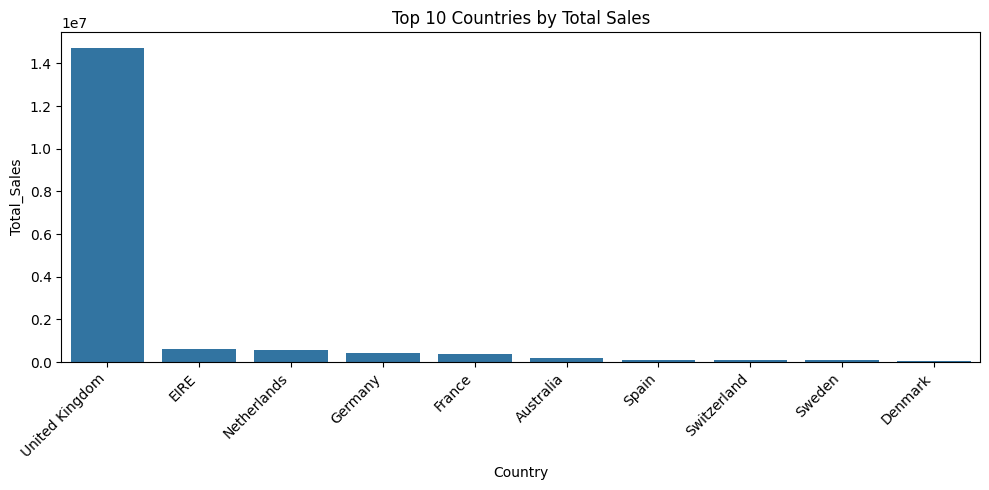

In [ ]:
top10 = country_revenue_df.head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top10, x="Country", y="Total_Sales")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries by Total Sales")
plt.tight_layout()
plt.show()



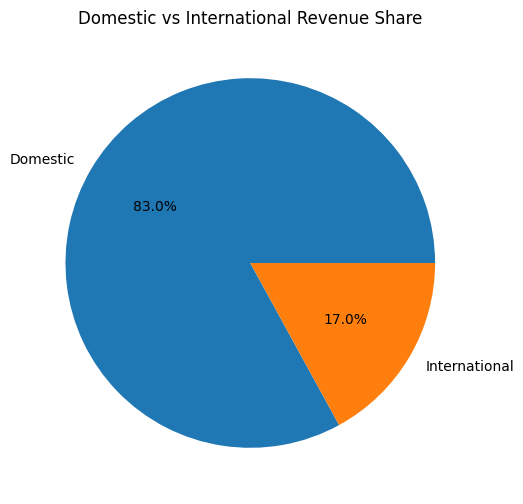

In [ ]:
labels = market_revenue.index
sizes = market_revenue.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Domestic vs International Revenue Share")
plt.show()

In [ ]:
product_qty = (
    df_clean.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
)

top_products_df = product_qty.head(10).reset_index()
top_products_df.columns = ["Description", "Total_Quantity"]
top_products_df


,Description,Total_Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
1,WHITE HANGING HEART T-LIGHT HOLDER,93640
2,"PAPER CRAFT , LITTLE BIRDIE",80995
3,ASSORTED COLOUR BIRD ORNAMENT,79913
4,MEDIUM CERAMIC TOP STORAGE JAR,77916
5,JUMBO BAG RED RETROSPOT,75759
6,BROCADE RING PURSE,71129
7,PACK OF 60 PINK PAISLEY CAKE CASES,55270
8,60 TEATIME FAIRY CAKE CASES,53495
9,PACK OF 72 RETROSPOT CAKE CASES,46107


In [ ]:
qty_array = np.array(top_products_df["Total_Quantity"])

print("NumPy array of quantities:", qty_array)
print("Mean quantity:", np.mean(qty_array))
print("Max quantity:", np.max(qty_array))
print("Min quantity:", np.min(qty_array))


NumPy array of quantities: [109169  93640  80995  79913  77916  75759  71129  55270  53495  46107]
Mean quantity: 74339.3
Max quantity: 109169
Min quantity: 46107


In [ ]:
N = 5
index = 0

print(f"Top {N} products (while loop example):")
while index < N:
    desc = top_products_df.loc[index, "Description"]
    qty = top_products_df.loc[index, "Total_Quantity"]
    print(index + 1, "-", desc, "->", qty, "units")
    index += 1


Top 5 products (while loop example):
1 - WORLD WAR 2 GLIDERS ASSTD DESIGNS -> 109169 units
2 - WHITE HANGING HEART T-LIGHT HOLDER -> 93640 units
3 - PAPER CRAFT , LITTLE BIRDIE -> 80995 units
4 - ASSORTED COLOUR BIRD ORNAMENT -> 79913 units
5 - MEDIUM CERAMIC TOP STORAGE JAR -> 77916 units


In [ ]:
sample_invoices = df_clean["Invoice"].unique()[:5]

invoice_products = {}
for inv in sample_invoices:

    products = df_clean[df_clean["Invoice"] == inv]["Description"].unique()
    invoice_products[inv] = list(products)

for inv, prod_list in invoice_products.items():
    print("Invoice:", inv)
    print("Number of distinct items:", len(prod_list))
    print("Items:")
    for p in prod_list:
        print("   -", p)
    print("-" * 40)


Invoice: 489434
Number of distinct items: 8
Items:
   - 15CM CHRISTMAS GLASS BALL 20 LIGHTS
   - PINK CHERRY LIGHTS
   -  WHITE CHERRY LIGHTS
   - RECORD FRAME 7" SINGLE SIZE 
   - STRAWBERRY CERAMIC TRINKET BOX
   - PINK DOUGHNUT TRINKET POT 
   - SAVE THE PLANET MUG
   - FANCY FONT HOME SWEET HOME DOORMAT
----------------------------------------
Invoice: 489435
Number of distinct items: 4
Items:
   - CAT BOWL 
   - DOG BOWL , CHASING BALL DESIGN
   - HEART MEASURING SPOONS LARGE
   - LUNCHBOX WITH CUTLERY FAIRY CAKES 
----------------------------------------
Invoice: 489436
Number of distinct items: 19
Items:
   - DOOR MAT BLACK FLOCK 
   - LOVE BUILDING BLOCK WORD
   - HOME BUILDING BLOCK WORD
   - ASSORTED COLOUR BIRD ORNAMENT
   -  PEACE WOODEN BLOCK LETTERS
   - CHRISTMAS CRAFT WHITE FAIRY 
   - HEART IVORY TRELLIS LARGE
   - HEART FILIGREE DOVE LARGE
   - FULL ENGLISH BREAKFAST PLATE
   - PIZZA PLATE IN BOX
   - BLACK DINER WALL CLOCK
   - SET OF 3 BLACK FLYING DUCKS
   - AREA P

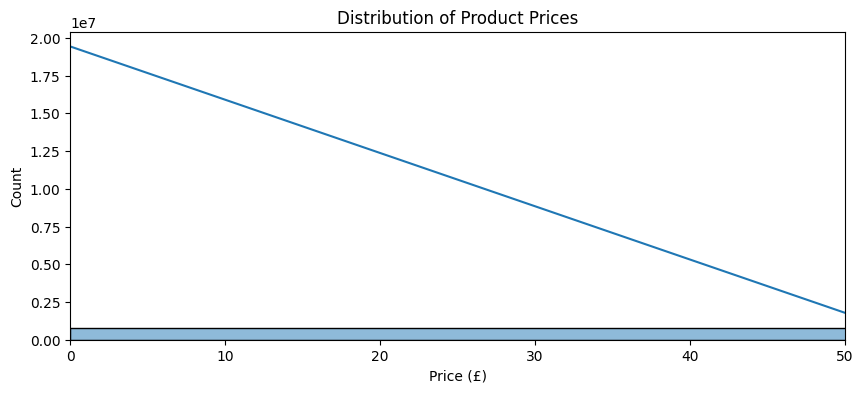

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df_clean["Price"], bins=50, kde=True)
plt.xlim(0, 50)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()


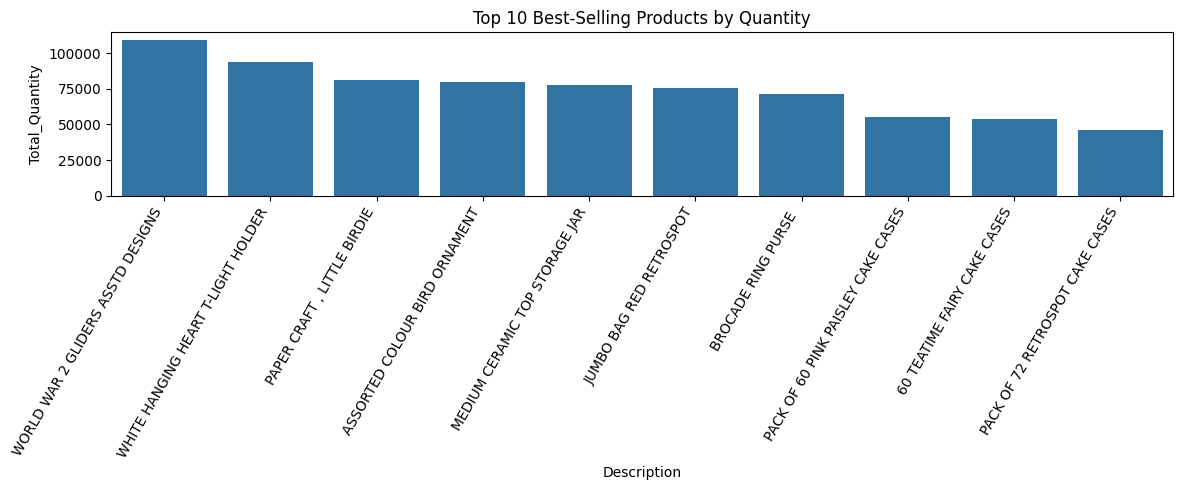

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=top_products_df, x="Description", y="Total_Quantity")
plt.xticks(rotation=60, ha="right")
plt.title("Top 10 Best-Selling Products by Quantity")
plt.tight_layout()
plt.show()


In [ ]:
df_clean["Year"] = df_clean["InvoiceDate"].dt.year
df_clean["Month"] = df_clean["InvoiceDate"].dt.month

monthly_sales = (
    df_clean.groupby(["Year", "Month"])["Sales"]
    .sum()
    .reset_index()
)

monthly_sales["MonthStart"] = pd.to_datetime(
    monthly_sales[["Year", "Month"]].assign(DAY=1)
)

monthly_sales.head()


,Year,Month,Sales,MonthStart
0,2009,12,686654.160,2009-12-01
1,2010,1,557319.062,2010-01-01
2,2010,2,506371.066,2010-02-01
3,2010,3,699608.991,2010-03-01
4,2010,4,594609.192,2010-04-01


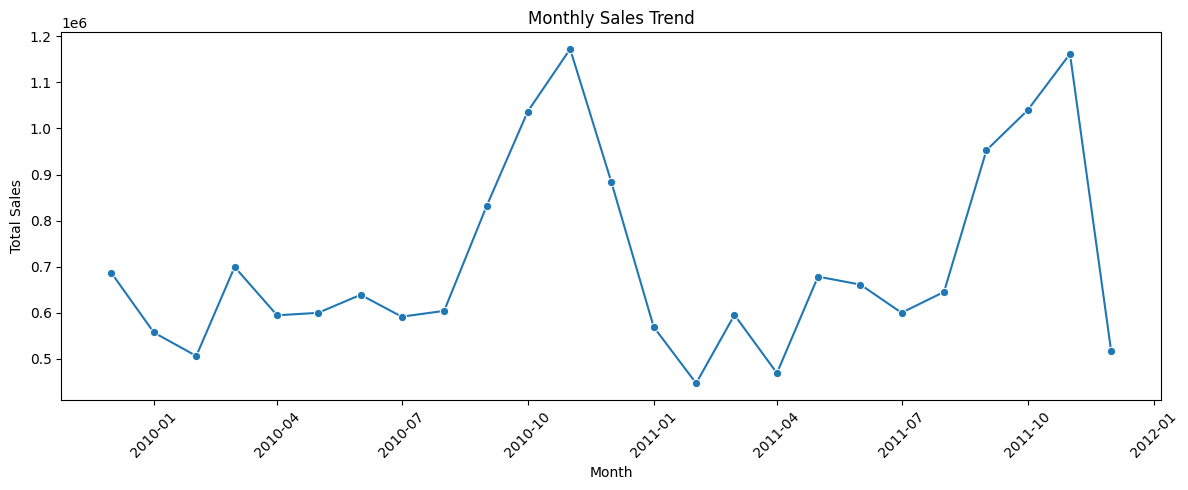

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x="MonthStart", y="Sales", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
customer_summary = df_clean.groupby("Customer_ID").agg(
    Total_Spend=("Sales", "sum"),
    Num_Orders=("Invoice", "nunique")
).reset_index()

customer_summary.head()


,Customer_ID,Total_Spend,Num_Orders
0,12346.0,77556.46,12
1,12347.0,5633.32,8
2,12348.0,2019.40,5
3,12349.0,4428.69,4
4,12350.0,334.40,1


In [ ]:
def customer_value_segment(spend):
    if spend >= 5000:
        return "Platinum"
    elif spend >= 2000:
        return "Gold"
    elif spend >= 500:
        return "Silver"
    else:
        return "Bronze"

customer_summary["Segment"] = customer_summary["Total_Spend"].apply(customer_value_segment)
customer_summary["Segment"].value_counts()


,count
Segment,
Silver,2188
Bronze,2035
Gold,985
Platinum,670


In [ ]:
customer_summary["High_Frequency"] = customer_summary["Num_Orders"].apply(
    lambda x: "Yes" if x >= 10 else "No"
)

customer_summary.head()


,Customer_ID,Total_Spend,Num_Orders,Segment,High_Frequency
0,12346.0,77556.46,12,Platinum,Yes
1,12347.0,5633.32,8,Platinum,No
2,12348.0,2019.40,5,Gold,No
3,12349.0,4428.69,4,Gold,No
4,12350.0,334.40,1,Bronze,No


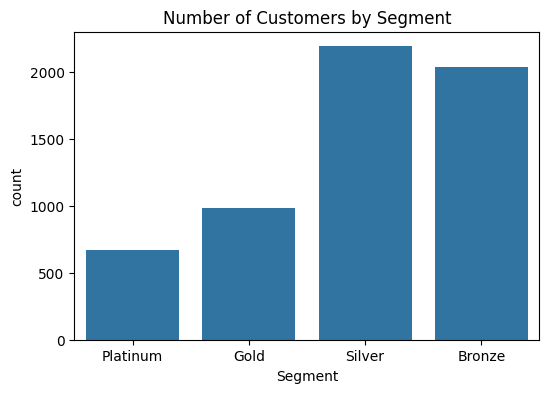

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=customer_summary, x="Segment", order=["Platinum", "Gold", "Silver", "Bronze"])
plt.title("Number of Customers by Segment")
plt.show()



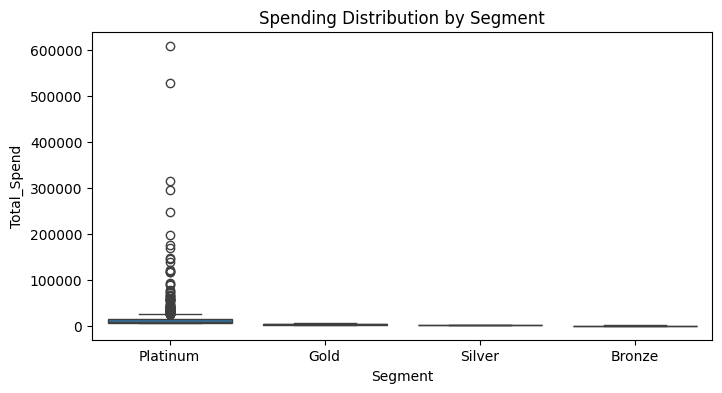

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=customer_summary, x="Segment", y="Total_Spend",
            order=["Platinum", "Gold", "Silver", "Bronze"])
plt.title("Spending Distribution by Segment")
plt.show()

In [ ]:
platinum_spend_array = np.array(
    customer_summary[customer_summary["Segment"] == "Platinum"]["Total_Spend"]
)

print("Platinum array length:", len(platinum_spend_array))
print("Average spend:", np.mean(platinum_spend_array))
print("Max spend:", np.max(platinum_spend_array))


Platinum array length: 670
Average spend: 17573.46781791045
Max spend: 608821.65


In [ ]:
def most_frequent_product(df):
    return df['Description'].mode()[0]

most_frequent_product(df)

'WHITE HANGING HEART T-LIGHT HOLDER'

In [ ]:
quantity_mean = df['Quantity'].mean()
quantity_median = df['Quantity'].median()
quantity_mode = df['Quantity'].mode()[0]

quantity_mean, quantity_median, quantity_mode

(np.float64(9.9388984711033), 3.0, np.int64(1))

In [ ]:
def top_products(df, n=10):
    return df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(n)

top_products(df)

,TotalPrice
Description,
REGENCY CAKESTAND 3 TIER,327813.65
DOTCOM POSTAGE,322647.47
WHITE HANGING HEART T-LIGHT HOLDER,257533.90
JUMBO BAG RED RETROSPOT,148800.64
PARTY BUNTING,147948.50
ASSORTED COLOUR BIRD ORNAMENT,131413.85
PAPER CHAIN KIT 50'S CHRISTMAS,121662.14
POSTAGE,112341.00
CHILLI LIGHTS,84854.16


In [ ]:
def revenue_statistics(df):
    arr = df['TotalPrice'].to_numpy()
    mean = np.mean(arr)
    median = np.median(arr)
    std = np.std(arr)
    return mean, median, std

revenue_statistics(df)

(np.float64(18.06986564933841),
 np.float64(9.899999999999999),
 np.float64(292.42008629701064))

In [ ]:
def most_common_country(df):
    return df['Country'].mode()[0]

most_common_country(df)

'United Kingdom'

In [ ]:
def customer_summary(df):
    summary = df.groupby('Customer ID').agg({
        'TotalPrice': 'sum',
        'Invoice': 'count',
        'Quantity': 'sum'
    }).rename(columns={
        'TotalPrice': 'Total_Spent',
        'Invoice': 'Total_Orders',
        'Quantity': 'Total_Items'
    })
    return summary

customer_summary(df).head()

,Total_Spent,Total_Orders,Total_Items
Customer ID,,,
12346.0,-64.68,48,52
12347.0,5633.32,253,3286
12348.0,2019.40,51,2714
12349.0,4404.54,180,1619
12350.0,334.40,17,197
